Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101129,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361.0,683467.0,45.985,0.226,7500.0,0.505,0.153,6.5,tests performed,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101130,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101131,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101134 entries, 0 to 101133
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               101134 non-null  object 
 1   continent                              96402 non-null   object 
 2   location                               101134 non-null  object 
 3   date                                   101134 non-null  object 
 4   total_cases                            97388 non-null   float64
 5   new_cases                              97385 non-null   float64
 6   new_cases_smoothed                     96375 non-null   float64
 7   total_deaths                           87207 non-null   float64
 8   new_deaths                             87363 non-null   float64
 9   new_deaths_smoothed                    96375 non-null   float64
 10  total_cases_per_million                96870 non-null   

Convert date to number

In [4]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101129,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361.0,683467.0,45.985,0.226,7500.0,0.505,0.153,6.5,tests performed,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,04072021
101130,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,05072021
101131,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,138

Percent new deaths to new cases

In [5]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101129,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361.0,683467.0,45.985,0.226,7500.0,0.505,0.153,6.5,tests performed,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,04072021,42.578947
101130,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,05072021,46.666667
101131,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,69

Country

In [6]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [7]:
print(len(list_country))

231


Graphical Representation

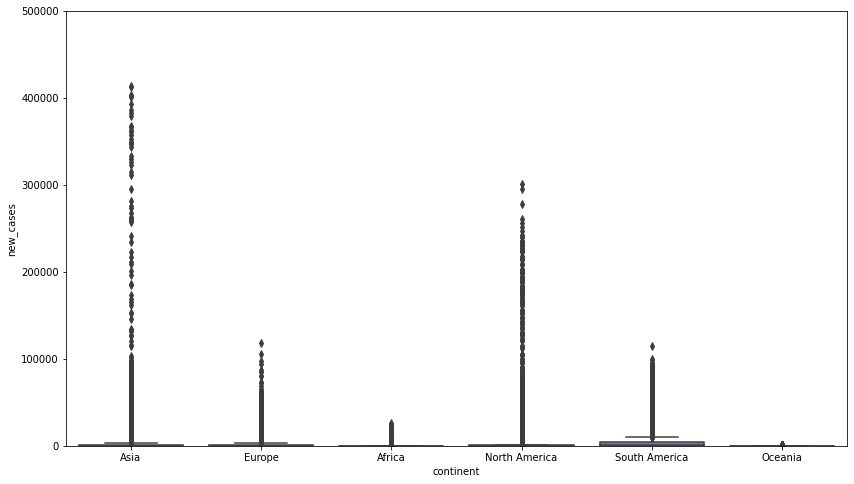

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

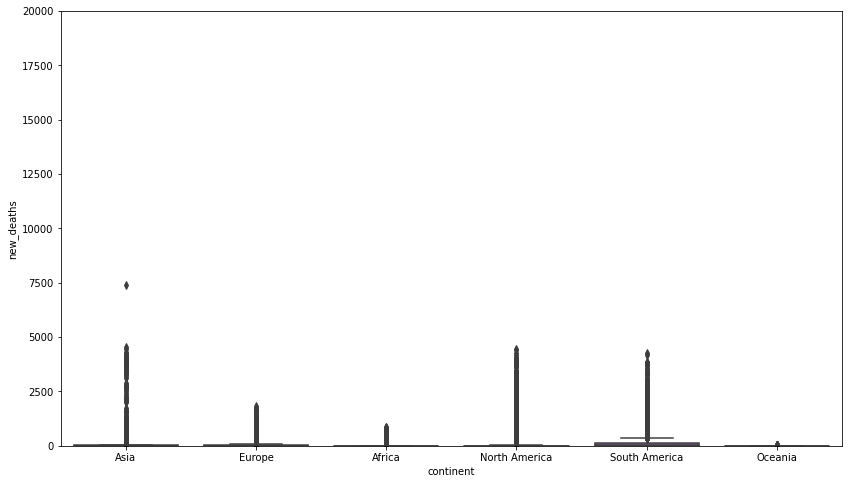

In [9]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

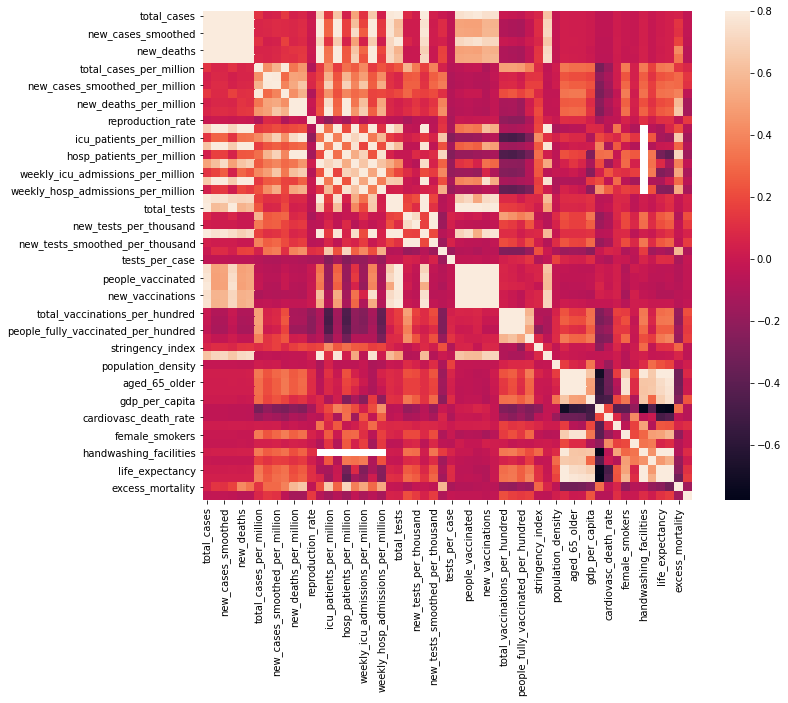

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [11]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
95316,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,31012020,NaN
95317,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,01022020,NaN
95318,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-5.15,02022020,NaN
95319,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,03022020,NaN
95320,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95836,GBR,Europe,United Kingdom,2021-07-04,4920168.0,23896.0,24503.429,128486.0,15.0,17.429,72476.913,352.002,360.950,1892.673,0.221,0.257,1.4,336.0,4.949,2148.0,31.641,NaN,NaN,NaN,NaN,1276593.0,213558757.0,3145.844,18.805,1101467.0,16.225,0.022,45.0,tests performed,79078081.0,45351719.0,33726362.0,188632.0,291403.0,116.49,66.81,49.68,4293.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,04072021,1593.066667
95837,GBR,Europe,United Kingdom,2021-07-05,4947274.0,27106.0,25129.571,128495.0,9.0,18.286,72876.200,399.287,370.173,1892.805,0.133,0.269,1.4,369.0,5.436,2328.0,34.293,NaN,NaN,NaN,NaN,1160738.0,214821127.0,3164.439,17.098,1105853.0,16.290,0.023,44.0,tests performed,79302857.0,45428681.0,33874176.0,224776.0,285618.0,116.82,66.92,49.90,4207.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,05072021,3011.

In [12]:
country = "Bangladesh"

include_b = df[df['location'].values == country]
exclude_b = df[df['location'].values != country]
b_cov19 = include_b
b_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
7807,BGD,Asia,Bangladesh,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,108.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,03032020,NaN
7808,BGD,Asia,Bangladesh,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,111.0,0.001,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,04032020,NaN
7809,BGD,Asia,Bangladesh,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,05032020,NaN
7810,BGD,Asia,Bangladesh,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,120.0,0.001,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,06032020,NaN
7811,BGD,Asia,Bangladesh,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,127.0,0.001,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,07032020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,BGD,Asia,Bangladesh,2021-07-04,944917.0,8661.0,8073.000,15065.0,153.0,127.571,5737.571,52.590,49.020,91.475,0.929,0.775,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29879.0,6722691.0,40.820,0.181,31260.0,0.190,0.258,3.9,tests performed,NaN,NaN,NaN,NaN,977.0,NaN,NaN,NaN,6.0,NaN,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,04072021,56.607843
8296,BGD,Asia,Bangladesh,2021-07-05,954881.0,9964.0,8301.571,15229.0,164.0,136.143,5798.073,60.502,50.407,92.471,0.996,0.827,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34002.0,6756693.0,41.027,0.206,31109.0,0.189,0.267,3.7,tests performed,10106136.0,5823245.0,4282891.0,NaN,939.0,6.14,3.54,2.6,6.0,NaN,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632,NaN,05072021,60.756098
8297,BGD,Asia,Bangladesh,2021-07-06,966406.0,11525.0,8852.857,15392.0,163.0,143.429

UK

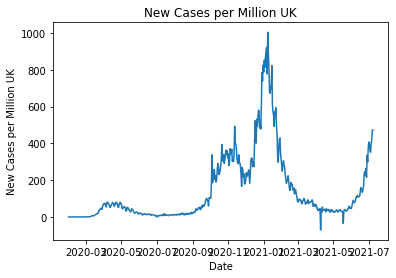

In [13]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

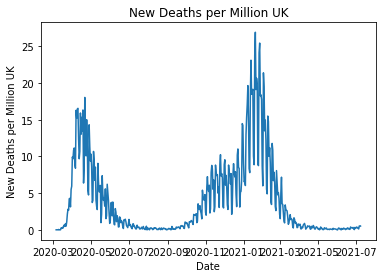

In [14]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

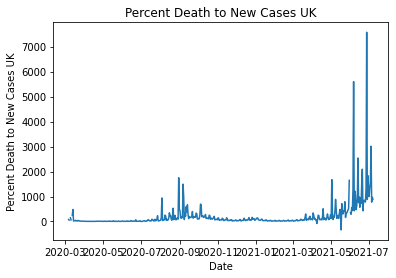

In [15]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

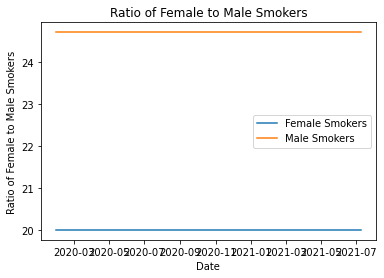

In [16]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

Bangladesh

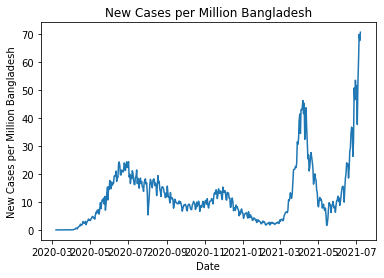

In [17]:
plt.plot(b_cov19.date, b_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Bangladesh')
plt.title('New Cases per Million Bangladesh')
plt.show()

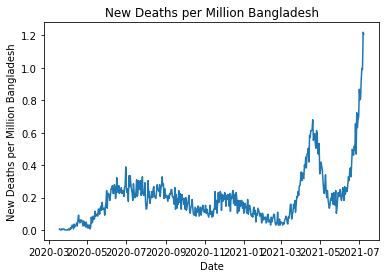

In [18]:
plt.plot(b_cov19.date, b_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Bangladesh')
plt.title('New Deaths per Million Bangladesh')
plt.show()

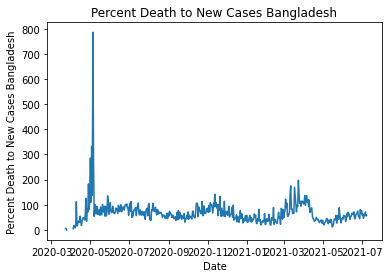

In [19]:
plt.plot(b_cov19.date, b_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Bangladesh')
plt.title('Percent Death to New Cases Bangladesh')
plt.show()

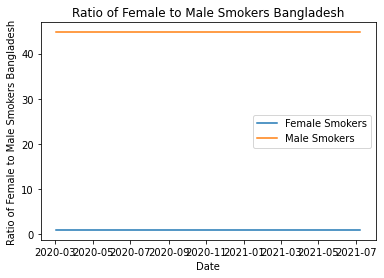

In [20]:
plt.plot(b_cov19.date, b_cov19.female_smokers)
plt.plot(b_cov19.date, b_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers Bangladesh')
plt.title('Ratio of Female to Male Smokers Bangladesh')
plt.show()

Comparisons

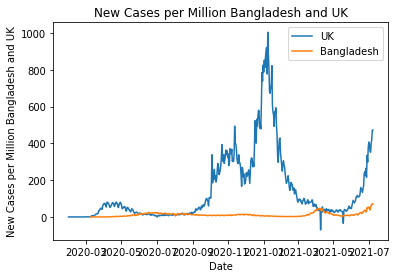

In [21]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.plot(b_cov19.date, b_cov19.new_cases_per_million)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million Bangladesh and UK')
plt.title('New Cases per Million Bangladesh and UK')
plt.show()

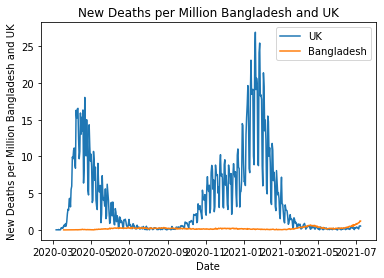

In [22]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.plot(b_cov19.date, b_cov19.new_deaths_per_million)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Bangladesh and UK')
plt.title('New Deaths per Million Bangladesh and UK')
plt.show()

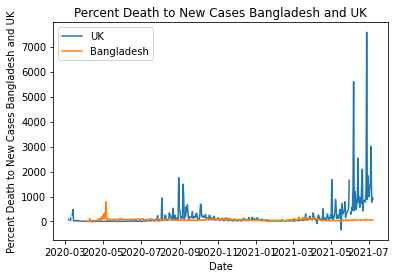

In [23]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.plot(b_cov19.date, b_cov19.per_death_to_case)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Bangladesh and UK')
plt.title('Percent Death to New Cases Bangladesh and UK')
plt.show()

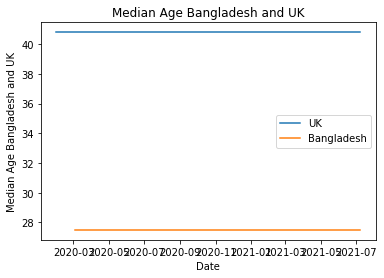

In [24]:
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.plot(b_cov19.date, b_cov19.median_age)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Median Age Bangladesh and UK')
plt.title('Median Age Bangladesh and UK')
plt.show()

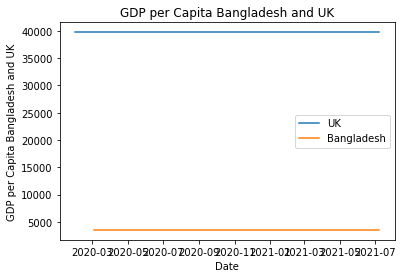

In [25]:
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.plot(b_cov19.date, b_cov19.gdp_per_capita)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita Bangladesh and UK')
plt.title('GDP per Capita Bangladesh and UK')
plt.show()

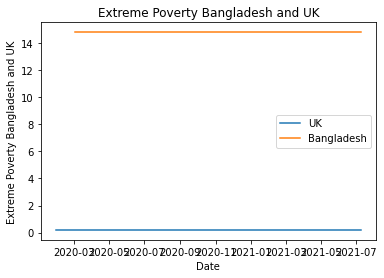

In [26]:
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.plot(b_cov19.date, b_cov19.extreme_poverty)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty Bangladesh and UK')
plt.title('Extreme Poverty Bangladesh and UK')
plt.show()

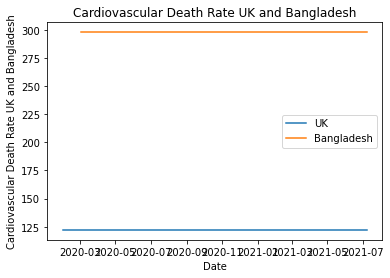

In [27]:
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.plot(b_cov19.date, b_cov19.cardiovasc_death_rate)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate UK and Bangladesh')
plt.title('Cardiovascular Death Rate UK and Bangladesh')
plt.show()

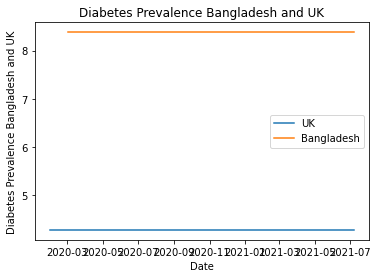

In [28]:
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.plot(b_cov19.date, b_cov19.diabetes_prevalence)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence Bangladesh and UK')
plt.title('Diabetes Prevalence Bangladesh and UK')
plt.show()

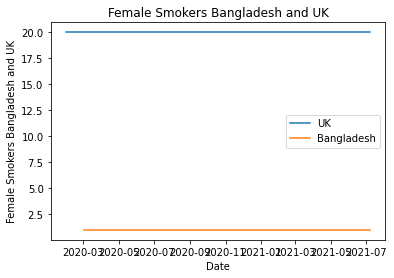

In [29]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(b_cov19.date, b_cov19.female_smokers)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Female Smokers Bangladesh and UK')
plt.title('Female Smokers Bangladesh and UK')
plt.show()

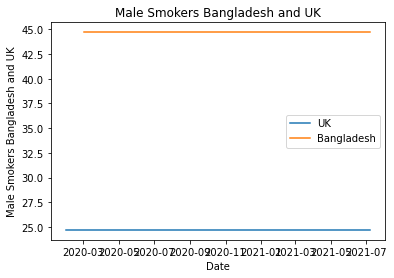

In [30]:
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.plot(b_cov19.date, b_cov19.male_smokers)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Male Smokers Bangladesh and UK')
plt.title('Male Smokers Bangladesh and UK')
plt.show()

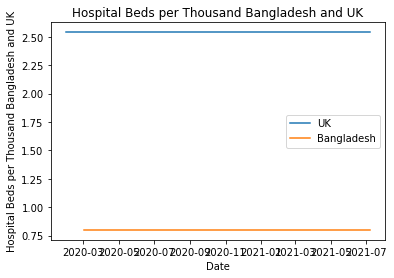

In [31]:
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.plot(b_cov19.date, b_cov19.hospital_beds_per_thousand)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand Bangladesh and UK')
plt.title('Hospital Beds per Thousand Bangladesh and UK')
plt.show()

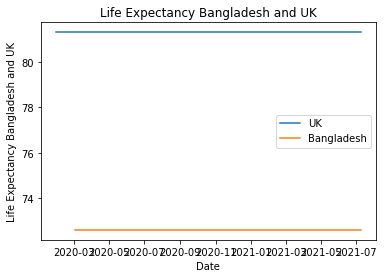

In [32]:
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.plot(b_cov19.date, b_cov19.life_expectancy)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy Bangladesh and UK')
plt.title('Life Expectancy Bangladesh and UK')
plt.show()

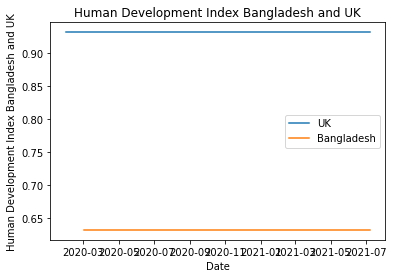

In [33]:
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.plot(b_cov19.date, b_cov19.human_development_index)
plt.legend(['UK', 'Bangladesh'])
plt.xlabel('Date')
plt.ylabel('Human Development Index Bangladesh and UK')
plt.title('Human Development Index Bangladesh and UK')
plt.show()